# **Projeto Integrado Feature Engineering**





In [1]:
# Importação das bibliotecas necessárias para manipulação de dados, visualização e técnicas de machine learning.
import numpy as np
import pandas as pd

In [2]:
# Carregando o conjunto de dados que será utilizado para o projeto.
df_descritivo = pd.read_excel(r"descritivo_características.xlsx",engine='openpyxl')
dataset = pd.read_csv("./dataset.txt", sep="\t", encoding="latin1")
dataset.columns = df_descritivo['Característica'].tolist()

/var/folders/93/n9092syd3gdczp37n2zvfxdr0000gn/T/ipykernel_26847/3281864338.py:3: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./dataset.txt", sep="\t", encoding="latin1")


## **Modelo Baseline**

In [3]:
#Importando bibliotecas necessárias para o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Criar um novo dataset apenas com as colunas que não possuem nenhum valor nulo
dataset_sem_nulos = dataset.dropna(axis=1, how='any')

In [5]:
# Separando o dataset entre treino e teste
# A critério de um baseline, não iremos utilizar as variáveis categóricas

X = dataset_sem_nulos.drop(columns=['ROTULO_ALVO_MAU=1'])
X = X.select_dtypes(include=['int64', 'float64'])
y = dataset_sem_nulos['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Normalizando as variaveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Definir o KNN Classifier
knn = KNeighborsClassifier()

# Definir o range de K
k_values = range(1, 50)

# Criação das listas para armazenar o resultado
accuracies = []
reports = []
matrices = []

# Loop para cada valor de K value e avaliação do modelo
for k in k_values:
    knn.set_params(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Cálculo de acurácia
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Geração do reporte de classificação
    report = classification_report(y_test, y_pred)
    reports.append(report)
    
    # Geração da matriz de confusão
    matrix = confusion_matrix(y_test, y_pred)
    matrices.append(matrix)

# Criando uma lista de tuplas (k, accuracy) e ordenando-a
k_accuracy_pairs = sorted(zip(k_values, accuracies), key=lambda x: x[1], reverse=True)

# Pegando os top 10 melhores Ks
top_50_k = k_accuracy_pairs[:50]

print("Top 10 melhores valores de K:")
for k, accuracy in top_50_k:
    print(f"K = {k}, Acurácia = {accuracy:.4f}")

# Buscando o K com maior acurácia
best_k, best_accuracy = top_50_k[0]

print(f"\nMelhor K value: {best_k}")
print(f"Melhor Acurácia: {best_accuracy:.4f}")
print("\nRelatório de Classificação para o melhor K:")
print(reports[k_values.index(best_k)])
print("Matriz de Confusão para o melhor K:")
print(matrices[k_values.index(best_k)])

Top 10 melhores valores de K:
K = 46, Acurácia = 0.7418
K = 36, Acurácia = 0.7416
K = 48, Acurácia = 0.7415
K = 47, Acurácia = 0.7415
K = 44, Acurácia = 0.7413
K = 45, Acurácia = 0.7412
K = 34, Acurácia = 0.7410
K = 32, Acurácia = 0.7409
K = 40, Acurácia = 0.7409
K = 42, Acurácia = 0.7409
K = 49, Acurácia = 0.7409
K = 38, Acurácia = 0.7408
K = 41, Acurácia = 0.7407
K = 43, Acurácia = 0.7407
K = 37, Acurácia = 0.7406
K = 30, Acurácia = 0.7402
K = 39, Acurácia = 0.7401
K = 26, Acurácia = 0.7400
K = 33, Acurácia = 0.7399
K = 35, Acurácia = 0.7399
K = 28, Acurácia = 0.7397
K = 31, Acurácia = 0.7392
K = 24, Acurácia = 0.7389
K = 22, Acurácia = 0.7387
K = 20, Acurácia = 0.7382
K = 27, Acurácia = 0.7382
K = 29, Acurácia = 0.7380
K = 18, Acurácia = 0.7368
K = 25, Acurácia = 0.7368
K = 23, Acurácia = 0.7363
K = 21, Acurácia = 0.7356
K = 16, Acurácia = 0.7348
K = 14, Acurácia = 0.7335
K = 19, Acurácia = 0.7335
K = 17, Acurácia = 0.7307
K = 10, Acurácia = 0.7305
K = 12, Acurácia = 0.7305
K = 15, 

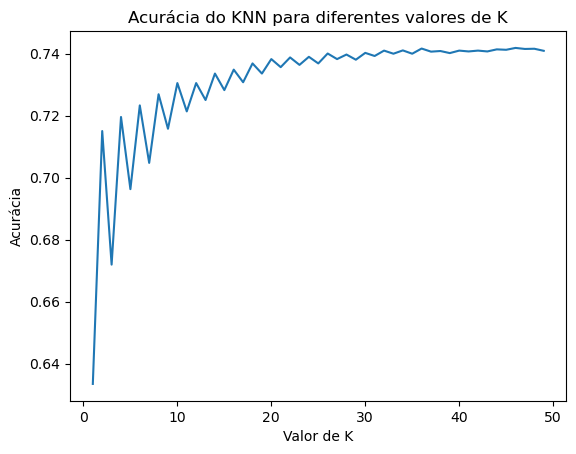

In [9]:
import matplotlib.pyplot as plt
# Plotar o gráfico de acurácia vs. K
plt.plot(k_values, accuracies)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.title("Acurácia do KNN para diferentes valores de K")
plt.show()


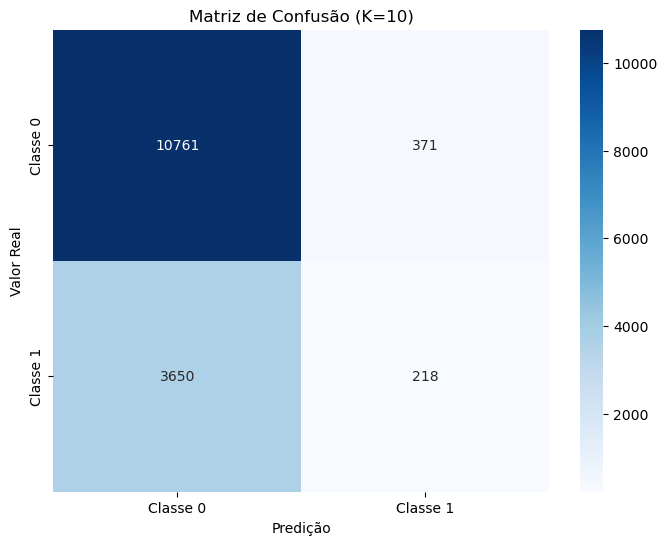

In [49]:
import seaborn as sns

#A partir da análise dos 50 K diferentes, decidimos selecionar o K = 10, visto que não há uma diferença tão grande
# da acurácia com valores de K muito maiores, e que um valor de K mais baixo nos ajudará a generalizar melhor o modelo.
knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão (K=10)')
plt.show()


O modelo sem dados nulos apresentou 74% de assertividade, porém uma grande dificuldade de mapear maus credores, com assertividade de apenas 43%.

## **Data Understanding & Cleaning**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         49999 non-null  int64  
 1   TIPO_FUNCIONARIO                   49999 non-null  object 
 2   DIA_PAGAMENTO                      49999 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               49999 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           49999 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               49999 non-null  int64  
 6   SEXO                               49999 non-null  object 
 7   ESTADO_CIVIL                       49999 non-null  int64  
 8   QUANT_DEPENDENTES                  49999 non-null  int64  
 9   NIVEL_EDUCACIONAL                  49999 non-null  int64  
 10  ESTADO_NASCIMENTO                  49999 non-null  object 
 11  CIDADE_NASCIMENTO                  49999 non-null  obj

In [12]:
dataset.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
1,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
2,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
3,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1
4,6,C,10,0,0,1,M,2,0,0,...,0,0,0,0,2,N,40,371,371,1


In [13]:
dataset.describe()

,ID_CLIENTE,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,NACIONALIDADE,TIPO_RESIDENCIA,MESES_RESIDENCIA,...,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,IDADE,ROTULO_ALVO_MAU=1
count,49999.000000,49999.000000,49999.0,49999.000000,49999.000000,49999.000000,49999.0,49999.000000,48650.000000,46222.000000,...,42686.000000,21116.000000,17662.000000,49999.0,49999.0,49999.0,49999.0,49999.000000,49999.000000,49999.000000
mean,25001.000000,12.870077,0.0,1.006540,2.148323,0.650513,0.0,0.961599,1.252230,9.727035,...,2.484281,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275706,43.248745,0.260805
std,14433.612391,6.608357,0.0,0.080607,1.322751,1.193666,0.0,0.202107,0.867841,10.668928,...,1.532262,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988295,14.989115,0.439078
min,2.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.000000,0.000000
25%,12501.500000,10.000000,0.0,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.000000,0.000000
50%,25001.000000,10.000000,0.0,1.000000,2.000000,0.000000,0.0,1.000000,1.000000,6.000000,...,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.000000,0.000000
75%,37500.500000,15.000000,0.0,1.000000,2.000000,1.000000,0.0,1.000000,1.000000,15.000000,...,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.000000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.000000,53.000000,0.0,2.000000,5.000000,228.000000,...,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.000000,1.000000


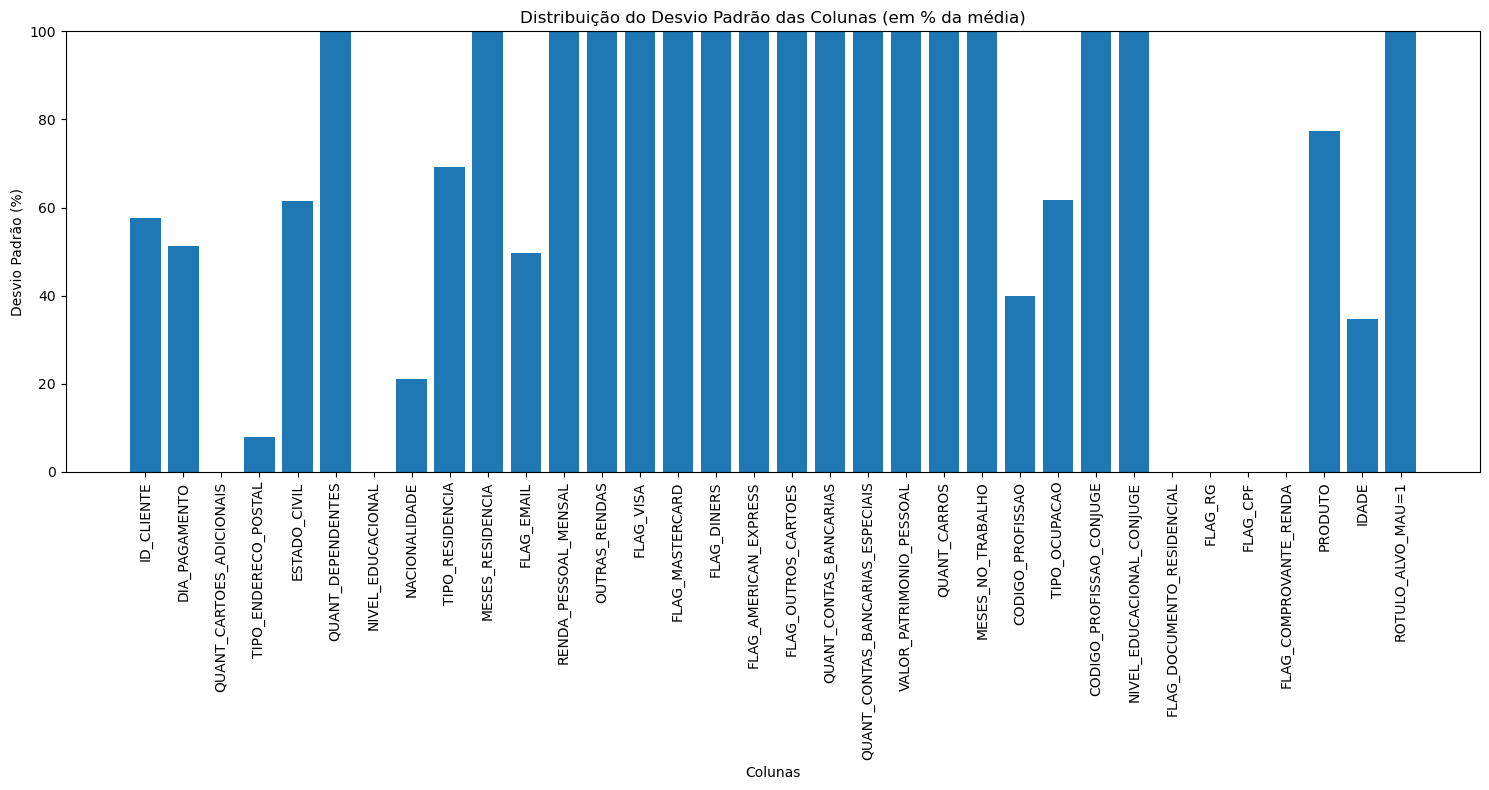

In [14]:
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
numerical_cols = dataset.select_dtypes(include=['number'])

# Calcular o desvio padrão para cada coluna numérica
std_devs = numerical_cols.std()

# Calcular a média para cada coluna numérica
means = numerical_cols.mean()

# Calcular o desvio padrão em percentual da média
std_devs_percent = (std_devs / means) * 100

# Criar um gráfico de barras com a distribuição do desvio padrão em percentual
plt.figure(figsize=(15, 8))  # Ajustar o tamanho da figura conforme necessário
plt.bar(std_devs_percent.index, std_devs_percent.values)
plt.xlabel('Colunas')
plt.ylabel('Desvio Padrão (%)')
plt.title('Distribuição do Desvio Padrão das Colunas (em % da média)')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.ylim(0, 100)  # Definir o limite do eixo y entre 0 e 100%
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()


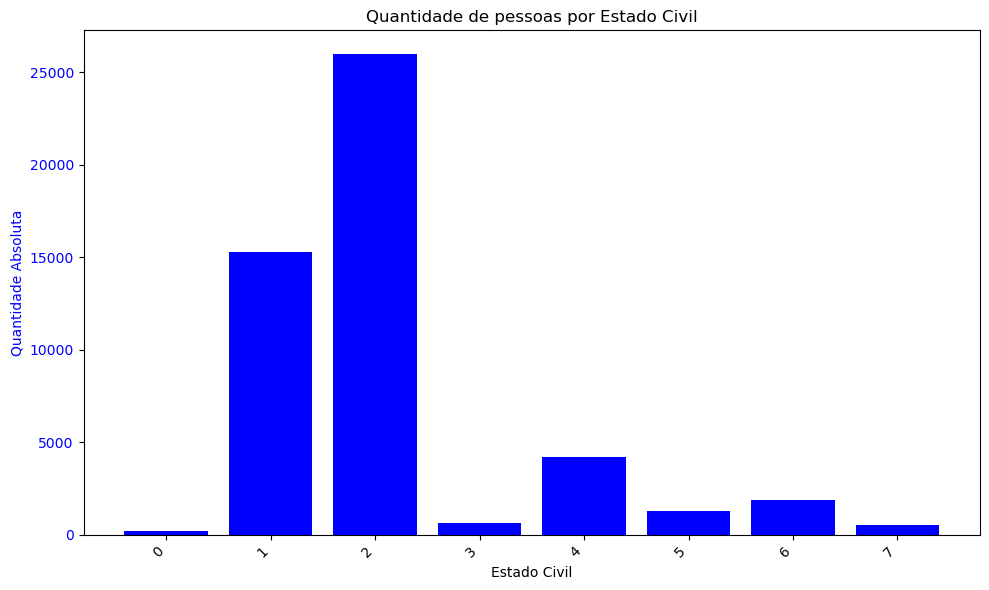

In [15]:
# Contar a quantidade de linhas para cada tipo de estado civil
estado_civil_counts = dataset['ESTADO_CIVIL'].value_counts()

# Criar um gráfico de barras mostrando a quantidade absoluta e o percentual de linhas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a quantidade absoluta
ax1.bar(estado_civil_counts.index, estado_civil_counts.values, color='blue')
ax1.set_xlabel('Estado Civil')
ax1.set_ylabel('Quantidade Absoluta', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Configuração do título e legendas
plt.title('Quantidade de pessoas por Estado Civil')
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


A partir da descrição estatística das variáveis, é possível notar que as variáveis quantitativas "QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA" estão com todos seus valores nulos, e, portanto, serão descartadas.
Outras colunas como ID_CLIENTE, não agregam nada ao modelo e também será descartada

Também estamos removendo ESTADO_CIVIL, pois existem 7 valores diferentes para estado civil, quando na realidade não existem mais do que 5 de acordo com a legislação brasileira: Solteiro(a), Casado(a), Separado(a), Divorciado(a), Viúvo(a), além do fato de não haver informação sobre esta codificação disponível no dataset.

In [16]:
#Retirar as colunas "QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG"
#"FLAG_CPF", "FLAG_COMPROVANTE_RENDA" do dataset

columns_to_drop = ["ID_CLIENTE","QUANT_CARTOES_ADICIONAIS", "NIVEL_EDUCACIONAL", "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA", "ESTADO_CIVIL"]
dataset = dataset.drop(columns=columns_to_drop)


In [17]:
# Analisar quantos valores distintos existem para as colunas categoricas

# Selecionar apenas as colunas categóricas
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Iterar sobre as colunas categóricas e imprimir o número de valores distintos
for column in categorical_columns:
  print(f"Coluna: {column}, Número de valores distintos: {dataset[column].nunique()}")


Coluna: TIPO_FUNCIONARIO, Número de valores distintos: 1
Coluna: TIPO_ENVIO_APLICACAO, Número de valores distintos: 3
Coluna: SEXO, Número de valores distintos: 4
Coluna: ESTADO_NASCIMENTO, Número de valores distintos: 29
Coluna: CIDADE_NASCIMENTO, Número de valores distintos: 9910
Coluna: ESTADO_RESIDENCIAL, Número de valores distintos: 27
Coluna: CIDADE_RESIDENCIAL, Número de valores distintos: 3528
Coluna: BAIRRO_RESIDENCIAL, Número de valores distintos: 14511
Coluna: FLAG_TELEFONE_RESIDENCIAL, Número de valores distintos: 2
Coluna: CODIGO_AREA_TELEFONE_RESIDENCIAL, Número de valores distintos: 102
Coluna: FLAG_TELEFONE_MOVEL, Número de valores distintos: 1
Coluna: EMPRESA, Número de valores distintos: 2
Coluna: ESTADO_PROFISSIONAL, Número de valores distintos: 28
Coluna: CIDADE_PROFISSIONAL, Número de valores distintos: 2236
Coluna: BAIRRO_PROFISSIONAL, Número de valores distintos: 5057
Coluna: FLAG_TELEFONE_PROFISSIONAL, Número de valores distintos: 2
Coluna: CODIGO_AREA_TELEFONE_

A partir da contagem de valores distintos das variáveis categoricas, é possível notar que as colunas "TIPO_FUNCIONARIO", "FLAG_TELEFONE_MOVEL", "FLAG_REGISTRO_ACSP" estão com todos seus valores iguais, e, portanto, serão descartadas.

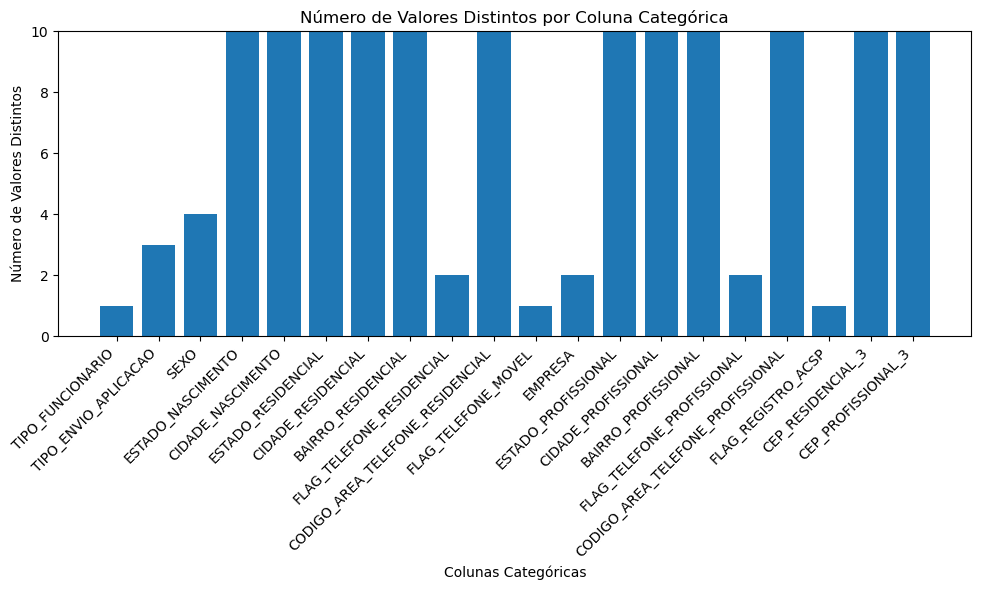

In [18]:
import matplotlib.pyplot as plt

# Selecionar apenas as colunas categóricas
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Criar uma lista para armazenar os números de valores distintos
unique_values_counts = []

# Iterar sobre as colunas categóricas e armazenar o número de valores distintos
for column in categorical_columns:
  unique_values_counts.append(dataset[column].nunique())

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(categorical_columns, unique_values_counts)
plt.xlabel('Colunas Categóricas')
plt.ylabel('Número de Valores Distintos')
plt.title('Número de Valores Distintos por Coluna Categórica')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)  # Definir o limite do eixo y entre 0 e 10
plt.tight_layout()
plt.show()


In [19]:
columns_cat_to_drop = ["TIPO_FUNCIONARIO", "FLAG_TELEFONE_MOVEL", "FLAG_REGISTRO_ACSP"]
dataset = dataset.drop(columns=columns_cat_to_drop)

Agora avaliaremos se existem dados vazios, nulos ou NaN nas features 'CEP_PROFISSIONAL_3' e 'CEP_RESIDENCIAL_3', dada a redundância de features relacionadas à localização Residencial e Profissional.

In [20]:
#Verificar os valores Nulos, Vazios ou NaN em CEP_PROFISSIONAL_3 and CEP_RESIDENCIAL_3
cep_columns = ['CEP_PROFISSIONAL_3', 'CEP_RESIDENCIAL_3']

for column in cep_columns:
    null_count = dataset[column].isnull().sum()
    empty_count = (dataset[column].astype(str).str.strip() == '').sum()
    nan_count = dataset[column].isna().sum()

    print(f"\nColumn: {column}")
    print(f"Null values: {null_count}")
    print(f"Empty values: {empty_count}")
    print(f"NaN values: {nan_count}")

    if null_count > 0 or empty_count > 0 or nan_count > 0:
        print(f"Total problematic values: {null_count + empty_count + nan_count}")
        print(f"Percentage of problematic values: {((null_count + empty_count + nan_count) / len(dataset)) * 100:.2f}%")
    else:
        print("No problematic values found.")


#Contar o número de células com qualquer valor dentro de 'CEP_PROFISSIONAL_3' and 'CEP_RESIDENCIAL_3'
cep_columns = ['CEP_PROFISSIONAL_3', 'CEP_RESIDENCIAL_3']

for column in cep_columns:
    non_empty_count = dataset[column].notna().sum()
    total_rows = len(dataset)
    percentage = (non_empty_count / total_rows) * 100

    print(f"\nColumn: {column}")
    print(f"Rows with values: {non_empty_count}")
    print(f"Total rows: {total_rows}")
    print(f"Percentage of rows with values: {percentage:.2f}%")


Column: CEP_PROFISSIONAL_3
Null values: 0
Empty values: 0
NaN values: 0
No problematic values found.

Column: CEP_RESIDENCIAL_3
Null values: 0
Empty values: 0
NaN values: 0
No problematic values found.

Column: CEP_PROFISSIONAL_3
Rows with values: 49999
Total rows: 49999
Percentage of rows with values: 100.00%

Column: CEP_RESIDENCIAL_3
Rows with values: 49999
Total rows: 49999
Percentage of rows with values: 100.00%


In [21]:
# Drop nas colunas relacionadas a localização residencial e profissional
columns_loc_to_drop = [
    'ESTADO_PROFISSIONAL', 'CIDADE_PROFISSIONAL', 'BAIRRO_PROFISSIONAL',
    'ESTADO_RESIDENCIAL', 'CIDADE_RESIDENCIAL', 'BAIRRO_RESIDENCIAL'
]

dataset = dataset.drop(columns=columns_loc_to_drop)



In [22]:
# Criar uma coluna contendo o primeiro dígito da coluna CEP_PROFISSIONAL_3 e chamar de ESTADO_PROFISSIONAL
dataset['REGIAO_PROFISSIONAL'] = dataset['CEP_PROFISSIONAL_3'].astype(str).str[0]

# Criar uma coluna contendo o primeiro dígito da coluna CEP_RESIDENCIAL_3 e chamar de ESTADO_RESIDENCIAL
dataset['REGIAO_RESIDENCIAL'] = dataset['CEP_RESIDENCIAL_3'].astype(str).str[0]


In [23]:
#Drop nas colunas relacionadas a informação de nascimento
columns_nascimento_e_nacionalidade_to_drop = [
    'ESTADO_NASCIMENTO','CIDADE_NASCIMENTO', 'NACIONALIDADE'
]
dataset = dataset.drop(columns=columns_nascimento_e_nacionalidade_to_drop)

In [24]:
dataset.head()

,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,TIPO_ENDERECO_POSTAL,SEXO,QUANT_DEPENDENTES,FLAG_TELEFONE_RESIDENCIAL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_EMAIL,...,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,PRODUTO,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1,REGIAO_PROFISSIONAL,REGIAO_RESIDENCIAL
0,15,Carga,1,F,0,Y,20,1.0,1.0,1,...,4.0,11.0,NaN,1,34,230,230,1,2,2
1,5,Web,1,F,0,Y,105,1.0,NaN,1,...,NaN,NaN,NaN,1,27,591,591,0,5,5
2,20,Web,1,F,0,N,,NaN,NaN,1,...,NaN,NaN,NaN,1,61,545,545,0,5,5
3,10,Web,1,M,0,Y,20,1.0,12.0,1,...,5.0,NaN,NaN,1,48,235,235,1,2,2
4,10,0,1,M,0,Y,33,1.0,4.0,1,...,2.0,0.0,0.0,2,40,371,371,1,3,3


**Após a limpeza inicial de dados saimos de 53 variáveis para 35 sem considerar a variável alvo (ROTULO_ALVO_MAU=1). Os próximos passos serão tratar, de forma simples e rápida, os dados nulos e os dados existentes para aplicar um modelo baseline**

### **Análise de Dados Nulos**

In [25]:
# Calcula a quantidade de valores nulos para cada coluna
null_counts = dataset.isnull().sum()

# Filtra apenas as colunas que possuem pelo menos um valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Cria um novo DataFrame com as colunas que possuem valores nulos
df_nulls = pd.DataFrame({'Quantidade de Nulos': columns_with_nulls})

# Calcula a porcentagem de valores nulos para cada coluna
df_nulls['Porcentagem de Nulos (%)'] = (df_nulls['Quantidade de Nulos'] / len(dataset)) * 100

# Organiza df_nulls em ordem crescente da coluna 'Quantidade de Nulos'
df_nulls = df_nulls.sort_values(by='Quantidade de Nulos')


# Imprime o DataFrame com a quantidade e a porcentagem de valores nulos para cada coluna
print("Colunas com valores nulos:")
print(df_nulls)


Colunas com valores nulos:
                           Quantidade de Nulos  Porcentagem de Nulos (%)
TIPO_RESIDENCIA                           1349                  2.698054
MESES_RESIDENCIA                          3777                  7.554151
TIPO_OCUPACAO                             7313                 14.626293
CODIGO_PROFISSAO                          7756                 15.512310
CODIGO_PROFISSAO_CONJUGE                 28883                 57.767155
NIVEL_EDUCACIONAL_CONJUGE                32337                 64.675294


Nota-se que 6 variáveis apresentam valores nulos

#### Tratativa para colunas com menos de 10% de valores nulls

In [26]:
# Imprimindo os diferentes tipos de valores em 'TIPO_RESIDENCIA'
print("Tipos de valores únicos em TIPO_RESIDENCIA:")
print(dataset['TIPO_RESIDENCIA'].unique())
print("\nContagem de cada tipo de valor:")
print(dataset['TIPO_RESIDENCIA'].value_counts(dropna=False))

# Tratamento de valores nulos para TIPO_RESIDENCIA usando a moda
tipo_residencia_mode = dataset['TIPO_RESIDENCIA'].mode()[0]
dataset['TIPO_RESIDENCIA'] = dataset['TIPO_RESIDENCIA'].fillna(tipo_residencia_mode)
print("Tratamento de valores nulos para TIPO_RESIDENCIA concluído.")
print("Moda utilizada para preenchimento:", tipo_residencia_mode)
print("Quantidade de valores nulos restantes em TIPO_RESIDENCIA:", dataset['TIPO_RESIDENCIA'].isnull().sum())

print("Tipos de valores únicos em TIPO_OCUPACAO:")
print(dataset['TIPO_OCUPACAO'].unique())
print("\nContagem de cada tipo de valor:")
print(dataset['TIPO_OCUPACAO'].value_counts(dropna=False))

# Tratamento de valores nulos para TIPO_OCUPACAO usando a moda
tipo_ocupacao_mode = dataset['TIPO_OCUPACAO'].mode()[0]
dataset['TIPO_OCUPACAO'] = dataset['TIPO_OCUPACAO'].fillna(tipo_ocupacao_mode)
print("Tratamento de valores nulos para MESES_RESIDENCIA e TIPO_OCUPACAO concluído.")
print("Mediana utilizada para preenchimento de TIPO_OCUPACAO:", tipo_ocupacao_mode)
print("Quantidade de valores nulos restantes em TIPO_OCUPACAO:", dataset['TIPO_OCUPACAO'].isnull().sum())


Tipos de valores únicos em TIPO_RESIDENCIA:
[ 1. nan  2.  5.  0.  3.  4.]

Contagem de cada tipo de valor:
TIPO_RESIDENCIA
1.0    41571
2.0     3884
5.0     1983
NaN     1349
0.0      760
4.0      311
3.0      141
Name: count, dtype: int64
Tratamento de valores nulos para TIPO_RESIDENCIA concluído.
Moda utilizada para preenchimento: 1.0
Quantidade de valores nulos restantes em TIPO_RESIDENCIA: 0
Tipos de valores únicos em TIPO_OCUPACAO:
[ 4. nan  5.  2.  1.  0.  3.]

Contagem de cada tipo de valor:
TIPO_OCUPACAO
2.0    16947
1.0     8742
NaN     7313
4.0     6999
5.0     6891
0.0     2788
3.0      319
Name: count, dtype: int64
Tratamento de valores nulos para MESES_RESIDENCIA e TIPO_OCUPACAO concluído.
Mediana utilizada para preenchimento de TIPO_OCUPACAO: 2.0
Quantidade de valores nulos restantes em TIPO_OCUPACAO: 0


In [27]:
# Tratamento de valores nulos para MESES_RESIDENCIA usando a mediana
meses_residencia_median = dataset['MESES_RESIDENCIA'].median()
dataset['MESES_RESIDENCIA'] = dataset['MESES_RESIDENCIA'].fillna(meses_residencia_median)
print("Tratamento de valores nulos para MESES_RESIDENCIA concluído.")
print("Mediana utilizada para preenchimento de MESES_RESIDENCIA:", meses_residencia_median)
print("Quantidade de valores nulos restantes em MESES_RESIDENCIA:", dataset['MESES_RESIDENCIA'].isnull().sum())


Tratamento de valores nulos para MESES_RESIDENCIA concluído.
Mediana utilizada para preenchimento de MESES_RESIDENCIA: 6.0
Quantidade de valores nulos restantes em MESES_RESIDENCIA: 0


#### Tratamento de Valores Nulos em Variáveis Categóricas

Colunas tratadas:
- TIPO_OCUPACAO
- CODIGO_PROFISSAO
- CODIGO_PROFISSAO_CONJUGE
- NIVEL_EDUCACIONAL_CONJUGE
- BAIRRO_PROFISSIONAL
- CIDADE_PROFISSIONAL

In [28]:
# Substituindo valores nulos por 999 para colunas numéricas
colunas_numericas = ['CODIGO_PROFISSAO', 'CODIGO_PROFISSAO_CONJUGE', 'NIVEL_EDUCACIONAL_CONJUGE']
for coluna in colunas_numericas:
    dataset[coluna] = dataset[coluna].fillna(999)

In [29]:
# Calcula a quantidade de valores nulos para cada coluna
null_counts = dataset.isnull().sum()

# Filtra apenas as colunas que possuem pelo menos um valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Cria um novo DataFrame com as colunas que possuem valores nulos
df_nulls = pd.DataFrame({'Quantidade de Nulos': columns_with_nulls})

# Calcula a porcentagem de valores nulos para cada coluna
df_nulls['Porcentagem de Nulos (%)'] = (df_nulls['Quantidade de Nulos'] / len(dataset)) * 100

# Organiza df_nulls em ordem crescente da coluna 'Quantidade de Nulos'
df_nulls = df_nulls.sort_values(by='Quantidade de Nulos')


# Imprime o DataFrame com a quantidade e a porcentagem de valores nulos para cada coluna
print("Colunas com valores nulos:")
print(df_nulls)

Colunas com valores nulos:
Empty DataFrame
Columns: [Quantidade de Nulos, Porcentagem de Nulos (%)]
Index: []


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DIA_PAGAMENTO                      49999 non-null  int64  
 1   TIPO_ENVIO_APLICACAO               49999 non-null  object 
 2   TIPO_ENDERECO_POSTAL               49999 non-null  int64  
 3   SEXO                               49999 non-null  object 
 4   QUANT_DEPENDENTES                  49999 non-null  int64  
 5   FLAG_TELEFONE_RESIDENCIAL          49999 non-null  object 
 6   CODIGO_AREA_TELEFONE_RESIDENCIAL   49999 non-null  object 
 7   TIPO_RESIDENCIA                    49999 non-null  float64
 8   MESES_RESIDENCIA                   49999 non-null  float64
 9   FLAG_EMAIL                         49999 non-null  int64  
 10  RENDA_PESSOAL_MENSAL               49999 non-null  float64
 11  OUTRAS_RENDAS                      49999 non-null  flo

### **Análise dos Dados Existentes**

_Para as variáveis onde há todos os dados, é necessário entender se os dados existentes fazem sentido_

Vamos começar analisando as variáveis binárias e categoricas. Variáveis como renda e patrimônio possuem muitos valores possíveis e sua coerência será analisada posteriormente a partir de análises de outliers. Enquanto as variáveis de texto como cidade e bairro não serão analisadas por existir inumeras possibilidades. As variáveis e CEP serão analisadas isoladamente

#### **Análise Binárias e Categoricas**

_Aqui buscamos entender os tipos de dados únicos existentes para variáveis binárias e categóricas_

In [31]:
columns_to_drop_x = ["CIDADE_NASCIMENTO", "CIDADE_RESIDENCIAL", "BAIRRO_RESIDENCIAL", "RENDA_PESSOAL_MENSAL", "OUTRAS_RENDAS", "VALOR_PATRIMONIO_PESSOAL", "CEP_RESIDENCIAL_3", "CEP_PROFISSIONAL_3"]
columns_without_nulls = dataset_sem_nulos.drop(columns=columns_to_drop_x)

In [32]:
# Iterar sobre as colunas e imprimir os valores distintos
for column in columns_without_nulls.columns:
    print(f"Coluna: {column}")
    print(columns_without_nulls[column].unique())
    print("-" * 20)

Coluna: ID_CLIENTE
[    2     3     4 ... 49998 49999 50000]
--------------------
Coluna: TIPO_FUNCIONARIO
['C']
--------------------
Coluna: DIA_PAGAMENTO
[15  5 20 10 25  1]
--------------------
Coluna: TIPO_ENVIO_APLICACAO
['Carga' 'Web' '0']
--------------------
Coluna: QUANT_CARTOES_ADICIONAIS
[0]
--------------------
Coluna: TIPO_ENDERECO_POSTAL
[1 2]
--------------------
Coluna: SEXO
['F' 'M' 'N' ' ']
--------------------
Coluna: ESTADO_CIVIL
[2 1 5 3 7 4 6 0]
--------------------
Coluna: QUANT_DEPENDENTES
[ 0  2  1  3  4  5  6  7 10  8 13 11  9 12 14 15 53]
--------------------
Coluna: NIVEL_EDUCACIONAL
[0]
--------------------
Coluna: ESTADO_NASCIMENTO
['RJ' 'RN' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'PA' 'PB' 'MA' ' ' 'GO' 'AC' 'MT'
 'AL' 'AP' 'TO' 'SC' 'PR' 'MS' 'DF' 'PI' 'RO' 'ES' 'AM' 'SE' 'RR' 'XX']
--------------------
Coluna: NACIONALIDADE
[1 0 2]
--------------------
Coluna: ESTADO_RESIDENCIAL
['RJ' 'RN' 'PE' 'MG' 'BA' 'SP' 'RS' 'CE' 'AP' 'MS' 'DF' 'PB' 'MA' 'PA'
 'GO' 'PR' 'M

### Organizando os tipos de dados


In [33]:
dataset.columns.tolist()

['DIA_PAGAMENTO',
 'TIPO_ENVIO_APLICACAO',
 'TIPO_ENDERECO_POSTAL',
 'SEXO',
 'QUANT_DEPENDENTES',
 'FLAG_TELEFONE_RESIDENCIAL',
 'CODIGO_AREA_TELEFONE_RESIDENCIAL',
 'TIPO_RESIDENCIA',
 'MESES_RESIDENCIA',
 'FLAG_EMAIL',
 'RENDA_PESSOAL_MENSAL',
 'OUTRAS_RENDAS',
 'FLAG_VISA',
 'FLAG_MASTERCARD',
 'FLAG_DINERS',
 'FLAG_AMERICAN_EXPRESS',
 'FLAG_OUTROS_CARTOES',
 'QUANT_CONTAS_BANCARIAS',
 'QUANT_CONTAS_BANCARIAS_ESPECIAIS',
 'VALOR_PATRIMONIO_PESSOAL',
 'QUANT_CARROS',
 'EMPRESA',
 'FLAG_TELEFONE_PROFISSIONAL',
 'CODIGO_AREA_TELEFONE_PROFISSIONAL',
 'MESES_NO_TRABALHO',
 'CODIGO_PROFISSAO',
 'TIPO_OCUPACAO',
 'CODIGO_PROFISSAO_CONJUGE',
 'NIVEL_EDUCACIONAL_CONJUGE',
 'PRODUTO',
 'IDADE',
 'CEP_RESIDENCIAL_3',
 'CEP_PROFISSIONAL_3',
 'ROTULO_ALVO_MAU=1',
 'REGIAO_PROFISSIONAL',
 'REGIAO_RESIDENCIAL']

In [34]:
datatypes = {
    'DIA_PAGAMENTO': object,
    'TIPO_ENVIO_APLICACAO': object,
    'TIPO_ENDERECO_POSTAL': object,
    'SEXO': object,
    'QUANT_DEPENDENTES': int,
    'FLAG_TELEFONE_RESIDENCIAL': bool,
    'CODIGO_AREA_TELEFONE_RESIDENCIAL': object,
    'TIPO_RESIDENCIA': object,
    'MESES_RESIDENCIA': int,
    'FLAG_EMAIL': bool,
    'RENDA_PESSOAL_MENSAL': float,
    'OUTRAS_RENDAS': float,
    'FLAG_VISA': bool,
    'FLAG_MASTERCARD': bool,
    'FLAG_DINERS': bool,
    'FLAG_AMERICAN_EXPRESS': bool,
    'FLAG_OUTROS_CARTOES': bool,
    'QUANT_CONTAS_BANCARIAS': int,
    'QUANT_CONTAS_BANCARIAS_ESPECIAIS': int,
    'VALOR_PATRIMONIO_PESSOAL': float,
    'QUANT_CARROS': int,
    'EMPRESA': bool,
    'FLAG_TELEFONE_PROFISSIONAL': bool,
    'CODIGO_AREA_TELEFONE_PROFISSIONAL': object,
    'MESES_NO_TRABALHO': int,
    'CODIGO_PROFISSAO': object,
    'TIPO_OCUPACAO': object,
    'CODIGO_PROFISSAO_CONJUGE': object,
    'NIVEL_EDUCACIONAL_CONJUGE': object,
    'PRODUTO': object,
    'IDADE': int,
    'CEP_RESIDENCIAL_3': str,
    'CEP_PROFISSIONAL_3': str,
    'ROTULO_ALVO_MAU=1': bool
}

In [35]:
dataset = dataset.astype(datatypes)


#### **Análise dados numéricos**

In [36]:
dataset.dtypes

DIA_PAGAMENTO                         object
TIPO_ENVIO_APLICACAO                  object
TIPO_ENDERECO_POSTAL                  object
SEXO                                  object
QUANT_DEPENDENTES                      int64
FLAG_TELEFONE_RESIDENCIAL               bool
CODIGO_AREA_TELEFONE_RESIDENCIAL      object
TIPO_RESIDENCIA                       object
MESES_RESIDENCIA                       int64
FLAG_EMAIL                              bool
RENDA_PESSOAL_MENSAL                 float64
OUTRAS_RENDAS                        float64
FLAG_VISA                               bool
FLAG_MASTERCARD                         bool
FLAG_DINERS                             bool
FLAG_AMERICAN_EXPRESS                   bool
FLAG_OUTROS_CARTOES                     bool
QUANT_CONTAS_BANCARIAS                 int64
QUANT_CONTAS_BANCARIAS_ESPECIAIS       int64
VALOR_PATRIMONIO_PESSOAL             float64
QUANT_CARROS                           int64
EMPRESA                                 bool
FLAG_TELEF

Avaliar quantidade de outliers e distrivuição para tomada de decisão de tratamento e tipo de escalonamento

_Inputando valroes medianos para variáveis nulas_

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_dataset = dataset.select_dtypes(exclude='object').drop(columns=['ROTULO_ALVO_MAU=1'])

# criar um objeto Imputer com a estratégia 'mediana'
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# ajustar o imputer ao conjunto de dados
imputer = imputer.fit(num_dataset)

# transformar o conjunto de dados para preencher valores ausentes
dataset_filled = imputer.transform(num_dataset)

# criar um novo dataframe com os valores preenchidos
dataset_filled = pd.DataFrame(dataset_filled, columns=num_dataset.columns)

_Escalonamento das variáveis numéricas_

In [38]:
from sklearn.preprocessing import StandardScaler

# criar um objeto StandardScaler
scaler = StandardScaler()

# ajustar o scaler ao conjunto de dados
scaler.fit(dataset_filled)

# transformar o conjunto de dados para escalonar os dados
dataset_scaled = scaler.transform(dataset_filled)

# criar um novo dataframe com os valores escalonados
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset_filled.columns)

_Criando o dataframe final para inclusão no modelo_

In [39]:
# Criando dummies
# Concatenando dataframe final

cat_columns = dataset.select_dtypes(include='object')

# Geracao de dummies com One Hot Encoding
dummies = pd.get_dummies(dataset[cat_columns.columns], drop_first=True, prefix=cat_columns.columns)


final_dataset = pd.concat([dummies,dataset_scaled,dataset['ROTULO_ALVO_MAU=1']],axis=1)

final_dataset.reset_index(drop=True)

final_dataset.head()

,DIA_PAGAMENTO_5,DIA_PAGAMENTO_10,DIA_PAGAMENTO_15,DIA_PAGAMENTO_20,DIA_PAGAMENTO_25,TIPO_ENVIO_APLICACAO_Carga,TIPO_ENVIO_APLICACAO_Web,TIPO_ENDERECO_POSTAL_2,SEXO_F,SEXO_M,...,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,EMPRESA,FLAG_TELEFONE_PROFISSIONAL,MESES_NO_TRABALHO,IDADE,ROTULO_ALVO_MAU=1
0,False,False,True,False,False,True,False,False,True,False,...,-0.045213,-0.745592,-0.745592,-0.054828,-0.711588,0.0,0.0,-0.024306,-0.617037,True
1,True,False,False,False,False,False,True,False,True,False,...,-0.045213,-0.745592,-0.745592,-0.054828,-0.711588,0.0,0.0,-0.024306,-1.084047,False
2,False,False,False,True,False,False,True,False,True,False,...,-0.045213,-0.745592,-0.745592,-0.054828,-0.711588,0.0,0.0,-0.024306,1.184288,False
3,False,True,False,False,False,False,True,False,False,True,...,-0.045213,-0.745592,-0.745592,-0.054828,-0.711588,0.0,0.0,-0.024306,0.316984,True
4,False,True,False,False,False,False,False,False,False,True,...,-0.045213,1.337956,1.337956,-0.054828,1.405308,0.0,0.0,-0.024306,-0.216742,True


### Modelo final

In [40]:
# Separando o dataset entre treino e teste
# A critério de um baseline, não iremos utilizar as variáveis categóricas

X = final_dataset.drop(columns=['ROTULO_ALVO_MAU=1'])

y = final_dataset['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
y.head()

0     True
1    False
2    False
3     True
4     True
Name: ROTULO_ALVO_MAU=1, dtype: bool

In [51]:
# Define o KNN Classifier com K fixo em 10
knn = KNeighborsClassifier(n_neighbors=10)

# Treina o modelo
knn.fit(X_train, y_train)

# Faz as previsões
y_pred = knn.predict(X_test)

# Cálculo de acurácia
accuracy = accuracy_score(y_test, y_pred)

# Geração do reporte de classificação
report = classification_report(y_test, y_pred)

# Geração da matriz de confusão
matrix = confusion_matrix(y_test, y_pred)

print(f"K value: 10")
print(f"Acurácia: {accuracy}")
print(report)
print(matrix)

K value: 10
Acurácia: 0.7319333333333333
              precision    recall  f1-score   support

       False       0.75      0.97      0.84     11132
        True       0.37      0.06      0.10      3868

    accuracy                           0.73     15000
   macro avg       0.56      0.51      0.47     15000
weighted avg       0.65      0.73      0.65     15000

[[10761   371]
 [ 3650   218]]


In [52]:
# Treino do KNN com o melhor valor de k
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

O modelo não teve uma melhora significativa em relação ao baseline.
O recall para flag=1 se manteve zerado.
Indicando que o modelo quase nunca identifica a classe 1 corretamente.

Para correção podemos utilizar técnicas de resampling.

### Reavaliação

In [53]:
#Aplicação de SMOTE para balancear as classes

from imblearn.over_sampling import SMOTE


X = final_dataset.drop(columns=['ROTULO_ALVO_MAU=1'])

y = final_dataset['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [50]:
knn = KNeighborsClassifier(n_neighbors=49)
knn.fit(X_train_sm, y_train_sm)

# Predição
y_pred = knn.predict(X_test)

# Avaliaçnao
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.80      0.78     11132
        True       0.32      0.28      0.30      3868

    accuracy                           0.66     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.65      0.66      0.65     15000

[[8865 2267]
 [2791 1077]]


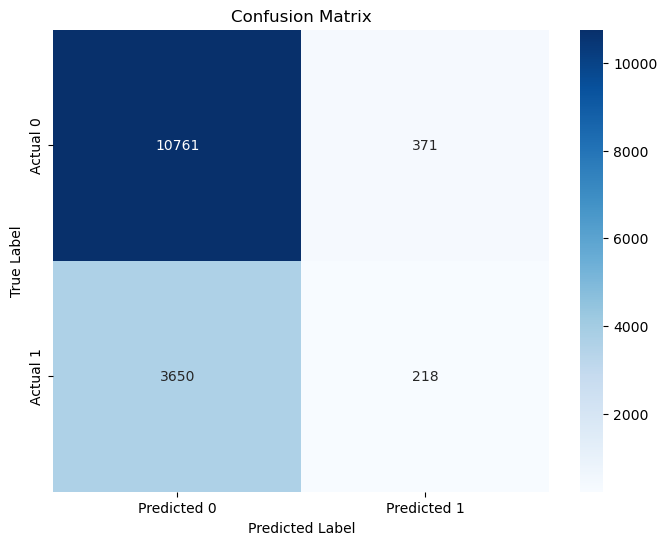

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assumindo que y_test e y_pred já são definidos pelos códigos passados

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Com o uso do SMOTE (Synthetic Minority Over-sampling Technique), caímos em acurácia, mas melhoramos significativamente em recall.
Porém, com recall ainda baixo.